## Data Cleaning And Inspection for Spray Dataset

In this section, the spray dataset is imported, inspected and cleaned.

In [2]:
# import libraries

# maths
import numpy as np
import pandas as pd

# others
import os
import re
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from scipy import stats

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category= (FutureWarning, UserWarning))

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

/Users/Dickson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load the dataset

df = pd.read_csv('./data/spray.csv')

In [4]:
# Quick inspection of the data

df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [5]:
# Check the number of rows and columns

df.shape

(14835, 4)

In [6]:
# Check the info.  There seems to be null values for Time.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [7]:
# Check for null values
# Time has 584 sets of null values

df.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [8]:
# Inspect where the null data comes from
# All null data is from 07 Sep 2011

df[df.Time.isnull()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [9]:
# Check how many rows have date 2011-09-07

df[df['Date']=='2011-09-07'].shape

(2114, 4)

In [10]:
# Since there is alot of data for the time of spray in a single day, 
# the rows with null values can be deleted

df.dropna(axis=0, inplace = True)

In [11]:
df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [12]:
# Change titles in columns to lower case.

df.columns = map(str.lower, df.columns)

In [13]:
# Split Date (ojbect) into day, month and year
# This will be useful later when EDA and modelling are performed

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_day(x): 
    return x.split('-')[2]

df['year'] = df.date.apply(create_yr)
df['month'] = df.date.apply(create_mth)
df['day'] = df.date.apply(create_day)

In [14]:
df.head()

,date,time,latitude,longitude,year,month,day
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,08,29
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,08,29
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,08,29
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,08,29
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,08,29


In [15]:
#save this clean spray data

df.to_csv('./data/spray_cleaned.csv',index=False)

## Is spraying effective in reducing the number of mosquitos?

In [16]:
# add station to the rows

df['station'] =[1 if x >41.876378 else 2 for x in df['latitude']]
df.head()

,date,time,latitude,longitude,year,month,day,station
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,08,29,1
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,08,29,1
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,08,29,1
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,08,29,1
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,08,29,1


In [17]:
# add a column called spray so later we can see if the data was sprayed when merged into other df

df['spray']=1
df.head()

,date,time,latitude,longitude,year,month,day,station,spray
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,08,29,1,1
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,08,29,1,1
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,08,29,1,1
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,08,29,1,1
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,08,29,1,1


In [18]:
df.columns

Index(['date', 'time', 'latitude', 'longitude', 'year', 'month', 'day',
       'station', 'spray'],
      dtype='object')

In [19]:
# Check the latest date
df.date.max()

'2013-09-05'

In [19]:
drop = ['time', 'latitude', 'longitude', 'year', 'month', 'day']

df2=df.drop(drop, axis=1)
df2.head()

,date,station,spray
0,2011-08-29,1,1
1,2011-08-29,1,1
2,2011-08-29,1,1
3,2011-08-29,1,1
4,2011-08-29,1,1


In [20]:
# load the merged weather-train-test csv file

df_merge = pd.read_csv('./data/weather_train_test.csv')

In [21]:
df_merge.head(2)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,id,station,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1.0,0.0,NaN,1,88,60,74.0,21.0,58,65.0,0,9,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1.0,0.0,NaN,1,88,60,74.0,21.0,58,65.0,0,9,421,1917,BR HZ,0.0,29.39,30.11,5.8,18,6.5,2007,5,29


In [22]:
train = df_merge[df_merge['id'].isnull()]

In [23]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'id', 'station', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'year', 'month', 'day'],
      dtype='object')

In [24]:
df_ttest = train[['station', 'date', 'nummosquitos']]
df_ttest.head()

,station,date,nummosquitos
0,1,2007-05-29,1.0
1,1,2007-05-29,1.0
2,1,2007-05-29,1.0
3,1,2007-05-29,1.0
4,1,2007-05-29,4.0


In [25]:
df_ttest = pd.merge(df_ttest, df2, how="left", on=['date', 'station'] )
df_ttest.head()


,station,date,nummosquitos,spray
0,1,2007-05-29,1.0,NaN
1,1,2007-05-29,1.0,NaN
2,1,2007-05-29,1.0,NaN
3,1,2007-05-29,1.0,NaN
4,1,2007-05-29,4.0,NaN


In [26]:
# Check the number of sprays vs no-spray

df_ttest['spray'].fillna(0, inplace =True)
df_ttest['spray'].value_counts()

1.0    750045
0.0      9951
Name: spray, dtype: int64

In [27]:
df_test_spray = df_ttest[['nummosquitos','spray']]

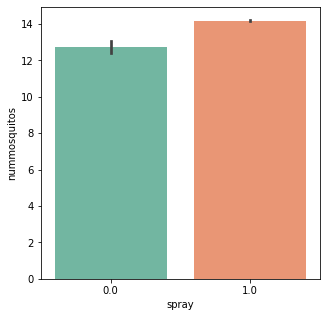

In [28]:
# plot the difference in the number of mosquitoes for spray and no-spray
# Spray - orange, no-spray - green

plt.subplots(figsize= (5,5))
ax = sns.barplot('spray', 'nummosquitos', data=df_test_spray, 
                  palette='Set2' )

In [29]:
spray0 = df_test_spray[df_test_spray['spray']==0]
spray1 = df_test_spray[df_test_spray['spray']==1]

ttest_ind(spray1['nummosquitos'], spray0['nummosquitos'])

Ttest_indResult(statistic=10.02190169832916, pvalue=1.2254401519023057e-23)

Although it is across different years that spraying is carried out, we treat the spray as independent to do a independent sample t-test instead of paired sample t test due to the unequal sample size. 

The t-test shows that there is a significant difference in the number of mosquitoes ($p$ < 0.00). It seems that there are more mosquitoes when spraying was carried out. 

This could actually be because spraying was done as there was an in increase in mosquitos, not that the spraying have increase the number of mosquitoes.

However, this may be a hint that we need more measures in place. For instance, education such as eliminating stagnant water, enforcements and fines for non-compliance or an increase in spraying frequency will further help reduce WNV infection.